<h1 style='text-align: center;'>CQF Exam Two Report - Harrison King</h1>
<h3 style='text-align: center;'>June 2023 Cohort</h3>

Use the expected value of the discounted payoff under the risk-neutral density $\mathbb{Q}$

$$
V(S, t)=e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\left[\text { Payoff }\left(S_{T}\right)\right]
$$

for the appropriate form of payoff, to consider **Asian** and **lookback** options.

Use the Euler-Maruyama (only) scheme for initially simulating the underlying stock price. As an initial example you may use the following set of sample data

$$
\begin{aligned}
\text { Today's stock price } S_{0} & =100 \\
\text { Strike } E & =100 \\
\text { Time to expiry }(T-t) & =1 \text { year } \\
\text { volatility } \sigma & =20 \% \\
\text { constant risk-free interest rate } r & =5 \%
\end{aligned}
$$

Then vary the data to see the affect on the option price. Your completed assignment should centre on a report to include:

$\begin{array}{ll}\text { } & \textbf { Mark Scheme } \\
                \text { Outline of the finance problem and numerical procedure used } & \text {20 \% } \\
                \text { Results - appropriate tables and comparisons } & 35 \% \\ 
                \text { Any interesting observations and problems encountered } & 25 \% \\ 
                \text { Conclusion } & 15 \% \\ \text { References } & 5 \%
\end{array}$

## 1. Financial and Numerical Outline

The finance problem is to price Asian and lookback options following the risk-neutral Black-Scholes-Merton framework, modelled using the Euler-Maruyama scheme to simulate the underlying asset prices. We will use a Monte Carlo numercial procedure to price the options due to the strong path-dependency of both types of options. As the underlying has the martingale property we will then use the expected value of the discounted payoff under the risk-neutral density $\mathbb{Q}$ to price the options.

### 1.1 The Euler-Maruyama Scheme

In this report the Euler-Maruyama scheme is used to discretise the underlying asset price. This scheme is a way of approximating numerical solutions to stochastic differential equations (SDEs).

Assuming that the underlying asset price follows a Geometric Brownian Motion (GBM) process, then the log of the returns are normally distributed and the underlying follows the Markov property. Therefore the SDE for the asset price is given by the risk-neutral random walk of the asset price, $S_{t}$:

$$
d S_{t}=r S_{t} d t+\sigma S_{t} d W_{t} \tag{1}
$$

where $r$ is the risk-free interest rate, $\sigma$ is the volatility of the asset price and $W_{t}$ is a Wiener process and is a Normally distributed random variable such that $dW(t) \sim N(0, dt)$. 

Dividing through by $S_{t}$ we get:

$$
\frac{d S_{t}}{S_{t}}=r d t+\sigma d W_{t} \tag{2}
$$

The solution $S_{t}$ can be found by applying Itô's lemma to the SDE. From Itô where $F(S) = log(S)$ we have:

$$
dF = \frac{dF}{dS_{t}}dS + \frac{1}{2} \sigma^{2}S_{t}^{2} \frac{d^{2}F}{dS_{t}^{2}}dt = \frac{1}{S_{t}}(r S_{t} dt + \sigma S dW_{t}) \tag{3}
$$

$$
dF = (r - \frac{1}{2} \sigma^{2}) dt + \sigma dW_{t} \tag{4}
$$

Therefore, by substituting $F(S) = log(S)$ into $\text{Equation (4)}$ for the lognormal random walk we can write the risk-neutral SDE for the asset price $S_{t}$ as:

$$
d(log S_{t}) = (r - \frac{1}{2} \sigma^{2}) dt + \sigma dW_{t} \tag{5}
$$

Integrating $\text{Equation (11)}$ and taking the exponential gives:

$$
S_{t} = S_{0} \exp \left ( \left(r - \frac{1}{2}\sigma^{2} \right )t + \sigma \int_{0}^{t} dW_{t}\right ) \tag{6}
$$

With $\phi_{i}$ as a standard Normally distriubted variable, we can then can express the risk-neutral asset price using the Euler-Maruyama method over a time step $\delta t$ as:

$$
S_{t+\delta t}=S_{t} \exp \left(\left(r-\frac{1}{2} \sigma^{2}\right) \delta t+\sigma \sqrt{\delta} t \phi_{i}\right) \tag{7}
$$

We will use the Euler-Maruyama scheme derived in $\text{Equation (7)}$ to simulate the underlying asset price paths for Asian and lookback options. We will use the Monte Carlo method to price the options as they are path-dependent options with three dimensions, this is discussed in more detail in the following sections.

### 1.2 Asian Options

#### 1.2.1 Financial Outline of Asian Options

Asian options are a type of exotic option that have a payoff which depends on the average price of the underlying asset over some period before expiry. They are commonly traded for currencies, commodities, interest rates and energy markets.

They are the strongly path dependent options because their value prior to expiry depends on the average to date of the asset rather than just the final price. This means that unlike vanilla options with a dimensionality of two (two independent variables, $S$ and $t$) the Asian option is a three-dimensional problem and the differential equation has three independent variables, the underlying asset price, $S$, the time, $t$, and the average price of the underlying asset over the life of the option, $A(0, T)$.

**Payoff Types of an Asian Option**

There are two classifications of the payoff type of Asian options:
- **Fixed strike or average rate**, where the average price is used in place of the underlying asset price in the payoff function.
- **Floating strike or average strike**, where the average price is used in place of the strike price in the payoff function.

The call, $C_{T}$, and put, $P_{T}$, payoffs for a **fixed strike** Asian option are given by:

$$
C_{T} = \max \left( A(0, T) - K, 0 \right) \tag{8}
$$
$$
P_{T} = \max \left( K - A(0, T), 0 \right) \tag{9}
$$

And the call, $C_{T}$, and put, $P_{T}$, payoffs for a **floating strike** Asian option are given by:

$$
C_{T} = \max \left( S(T) - A(0, T), 0 \right) \tag{10}
$$
$$
P_{T} = \max \left( A(0, T) - S(T), 0 \right) \tag{11}
$$

where $K$ is the strike price and $T$ is the time to maturity.

#### 1.2.2 Numerical Approach of Pricing Asian Options

**Arithmetic and Geometric Asian Options**

The average price, $A(0, T)$, can be computed in several ways, the most common being the arithmetic and geometric average. The arithmetic average is the sum of the asset prices, equally weighted, divided by the total number of prices used. The geometric average on the other hand is the exponential of the sum of all the logarithms of the constituent prices, equally weighted, divided by the total number of price used. Continuously sampled geometric Asian options are easy to price as there is a closed form analytical solution using the Black-Scholes formula. This is because the geometric average of a lognormally distributed underlying asset has a lognormal distribution.

Conversely, arithmetic Asian options are difficult to price as the arithmetic average of a lognormally distributed underlying asset does not have a lognormal distribution. This means that we cannot use the Black-Scholes formula to price the option and instead we must use a Monte Carlo approach for pricing. As the Monte Carlo scheme of pricing exotic options is the focus of this report, we will focus on arithmetic Asian options.

**Discrete and Continuous Sampled Averages**

The data could be continously sampled or sampled at discrete times to calculate averages. With the former, using every realised price over a finite time period, the sums calculated in the average become integrals of the asset price over the averaging period. This gives a continuously sampled average. With the latter and more common sampling approach, the averaging period is divided into $N$ discrete time intervals beginning at time $t = 0$ and ending at maturity, $T$. The average is calculated using the asset price at the end of each interval (for example, using the closing price of the asset at the end of each day). This gives a discretely sampled average. The discretely sampled average is more common outside of theoretical contexts as it is more practical and more realistic. This will be the main approach taken in this report.

The discretely sampled arithmetic average of the asset price is defined by:

$$
A(0, T) = \frac{1}{N} \sum^{N}_{i=1} S(t_i) \tag{12}
$$

And the discretely sampled geometric mean is defined by:

$$
A(0, T) = \exp \left( \frac{1}{N} \sum^{N}_{i=1} \ln S(t_i) \right) \tag{13}
$$

**Monte Carlo Pricing of Asian Options**

Monte Carlo Simulations are used to price Asian options as they are strongly path-dependent options with three dimensions.

Taking the fixed strike arithemetic average Asian option values from the call and put payoffs in $\text{Equation (8)}$ and $\text{Equation (9)}$, we can price the options using the Monte Carlo method. The Monte Carlo method is then:
1. Simulate the risk-neutral random walk over the time horizon, starting at $S(0)$ and ending at $S(T)$. This is done using the Euler-Maruyama scheme and gives one realisation of the underlying price path.
2. Perform many more realisations to generate a total of 10,000 random realisations over the time horizon.
3. Calculate the payoff for each realisation of the underlying price path using the discretely sampled arithmetic average of the asset price over the life of the option, $A(0, T)$, and the strike price, $K$ given by $\text{Equation (12)}$.
4. Calculate the average or *expected* payoff over all the realisations.
5. Present value the expected payoff using the risk-free interest rate, $r$, and the time to maturity, $T$.

The expected present value of a fixed strike arithmetic Asian call, $C$, and put, $P$, option with time to expiry, $T - t$, is therefore:

$$
C = e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\left[\max \left( A(0, T) - K, 0 \right) \right] \tag{14}
$$

$$
P = e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\left[\max \left( K - A(0, T), 0 \right) \right] \tag{15}
$$

where $\mathbb{E}^{\mathbb{Q}}$ is the expectation under the risk-neutral measure.

### 1.3 Lookback Options

#### 1.3.1 Financial Outline of Lookback Options

Lookback options are a type of exotic option that have a payoff which depends on the maximum or minimum price of the underlying asset over some period before expiry. Since they have such extreme payoffs, they are often expensive contracts.

Lookback options are strongly path dependent options because their value prior to expiry depends on the maximum or minimum to date of the asset rather than just the final price. This means that unlike vanilla options with a dimensionality of two (two independent variables, $S$ and $t$) the lookback option is a three-dimensional problem and the differential equation has three independent variables, the underlying asset price, $S$, the time, $t$, and the maximum or minimum price of the underlying asset over the life of the option, $M(0, T)$.

**Payoff Types of a Lookback Option**

Similarly to Asian options, there are two classifications of the payoff type of lookback options:
- **Fixed strike or average rate**, where the maximum or minimum price is used in place of the underlying asset price in the payoff function.
- **Floating strike or average strike**, where the maximum or minimum price is used in place of the strike price in the payoff function.

The call, $C_{T}$, and put, $P_{T}$, payoffs for a **fixed strike** lookback option are given by:

$$
C_{T} = \max \left( M(0, T) - K, 0 \right) \tag{17}
$$
$$
P_{T} = \max \left( K - M(0, T), 0 \right) \tag{18}
$$

And the call, $C_{T}$, and put, $P_{T}$, payoffs for a **floating strike** lookback option are given by:

$$
C_{T} = \max \left( S(T) - M(0, T), 0 \right) \tag{19}
$$
$$
P_{T} = \max \left( M(0, T) - S(T), 0 \right) \tag{20}
$$

where $K$ is the strike price and $T$ is the time to maturity.


#### 1.3.2 Numerical Approach of Pricing Lookback Options

**Discrete and Continuous Measurement of the Maximum**

Much like Asian options, the path dependent variable ($M(0, T)$) can be calculated with continous or discrete sampling. Focussing just on the maximum lookback option with the former, using every realised price over a finite time period, the maximum price becomes the maximum of the asset price over the prescribed period giving a continously sampled maximum. With this sampling methodology the realised asset price is always less than or equal to the maximum. This theoretical approach allows for a closed form analytical solution using the Black-Scholes formula, however as with Asian options continous monitoring is less practical than discrete. 

The discretly sampled approach of dividing the prescribed period into $N$ discrete time intervals beginning at time $t = 0$ and ending at maturity, $T$ is commonly used in practise. The discretly sampled maximum is calculated using the asset price at the end of each interval (for example, using the closing price of the asset at the end of each day). With this methodology, the asset price can exceed the maximum, $M(0, T)$. Additionally, the maximum is much less frequently increased across the prescribed period, therefore as well as being more practical than continous sampling, the discretly sampled maximum results in a lower option price and is used to decrease the value of a contract. [PWIQF2]

The discretely sampled maximum and minimum of the asset price are defined by:

$$
M(0, T) = \max \left( S(t_1), S(t_2), \dots, S(t_N) \right) \tag{21}
$$
$$
M(0, T) = \min \left( S(t_1), S(t_2), \dots, S(t_N) \right) \tag{22}
$$

**Monte Carlo Pricing of Lookback Options**

The Monte Carlo Pricing of lookback options is very similar to that of Asian options. The Euler-Maruyama scheme assuming a GBM process is used to simulate the underlying asset price as derived in $\text{Equation (7)}$.

Taking the fixed strike maximum lookback option values from the call and put payoffs in $\text{Equation (17)}$ and $\text{Equation (18)}$, we can price the options using the Monte Carlo method. The Monte Carlo method is then:
1. Simulate the risk-neutral random walk over the time horizon, starting at $S(0)$ and ending at $S(T)$. This is done using the Euler-Maruyama scheme and gives one realisation of the underlying price path.
2. Perform many more realisations to generate a total of 10,000 random realisations over the time horizon.
3. Calculate the payoff for each realisation of the underlying price path using the maximum of the asset price over the life of the option, $M(0, T)$, and the strike price, $K$ given by $\text{Equation (21)}$.
4. Calculate the average or *expected* payoff over all the realisations.
5. Present value the expected payoff using the risk-free interest rate, $r$, and the time to maturity, $T$.

The expected present value of a fixed strike maximum lookback call, $C$, and put, $P$, option with time to expiry, $T - t$, is therefore:

$$
C = e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\left[\max \left( M(0, T) - K, 0 \right) \right] \tag{23}
$$
$$
P = e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\left[\max \left( K - M(0, T), 0 \right) \right] \tag{24}
$$

## 2. Implementation and Results

### 2.1 Monte Carlo Simulation Class

As we assume that the underlying asset price for both Asian and lookback options both follow a Geoemtric Brownian Motion (GBM) process we will define a base class for the Monte Carlo simulation with the method `generate_Paths()`. This method will simulate the underlying asset price paths using the Euler-Maruyama scheme as derived in $\text{Equation (7)}$. We will then inherit this class for the Asian and lookback options and define the payoff functions for each option type.

In [29]:
# Install dependencies
import numpy as np
import pandas as pd
import scipy.stats as ss
import tabulate
import matplotlib.pyplot as plt
from typing import Tuple

# Configure matplotlib plots for A4 paper
plt.rcParams['figure.figsize'] = (11, 8)
plt.rcParams['figure.dpi'] = 300

In [61]:
class MonteCarloSimulation:
  ''' Class for a Geometric Brownian Motion process
  Args:
    S0 (float): The initial underlying asset price
    E (float): The strike price
    time_steps (int): The number of time steps to simulate 
    T (float): The time horizon or time to maturity in years
    r (float): Risk-free rate as the drift coefficient
    sigma (float): Volatility
    number_of_paths (int): The number of path realisations
    random_seed (int): The random seed for reproducibility [default: 0]
  
  Returns:
    None
  '''
  def __init__(self, S0: float, E: float, time_steps: int, T: float, r: float, 
               sigma: float, number_of_paths: int, random_seed: int):
    self.S0 = S0
    self.E = E
    self.time_Steps = time_steps
    self.T = T
    self.r = r
    self.sigma = sigma
    self.number_Of_Paths = number_of_paths
    self.random_Seed = random_seed
  
  def generate_Paths(self) -> Tuple[np.ndarray, np.ndarray]:
    ''' Simulate the underlying asset price paths assuming they follow a risk-neutral
    Geoemtric Brownian Motion process using the Euler-Maruyama scheme.
    Args:
        None

    Returns:
      St, time_axis (Tuple[np.ndarray, np.ndarray]): A tuple of the time axis of the
      generated paths and the array path realisations themselves. St has shape 
      (time_steps, number_of_paths) and tt has shape (time_steps, ).
    '''
    # Set the seed for reproducibility
    np.random.seed(self.random_Seed)

    # Calculate dt and time axis used for plotting
    T = self.T

    time_axis, dt = np.linspace(0, T, self.time_Steps, retstep=True)

    # Set the input paramters, r is the risk-free rate 
    r = self.r
    sigma = self.sigma

    # Simulate paths
    St = np.zeros((self.time_Steps, self.number_Of_Paths))
    St[0] = self.S0

    # Produce an array of standard normal random numbers
    phi = np.random.standard_normal(size=(self.time_Steps, self.number_Of_Paths))

    # Simulate the GBM process using the Euler-Maruyama scheme
    for t in range(1, self.time_Steps):
      St[t] = St[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma 
                                     * np.sqrt(dt) * phi[t-1])
    
    return St, time_axis

### 2.2 Asian Option Class

We will define a class for the Asian option which will inherit the Monte Carlo simulation class. The methods `call_Price()` and `put_Price()` calculate the price of the fixed strike arithmetic Asian call and put options respectively using the Monte Carlo simulated asset price paths returned from the `generate_Paths()` method. The option prices are then the expected present value of a fixed strike arithmetic Asian call, $C$, and put, $P$, option with time to expiry, $T - t$ given by $\text{Equation (14)}$ and $\text{Equation (15)}$ respectively.

In [71]:
class AsianOption(MonteCarloSimulation):
    def __init__(self, S0: float, E: float, time_steps: int, T: float, r: float, 
               sigma: float, number_of_paths: int, random_seed):
      super().__init__(S0, E, time_steps, T, r, sigma, number_of_paths, random_seed)
    
    def call_Price(self, St: np.ndarray) -> float:
        ''' Calculate the price of a fixed strike arithmetic Asian call option with 
        time to maturity T by discounting the average payoff
        Args:
            St (np.ndarray): An array of underlying asset price path realisations with 
            shape (time_steps, number_of_paths)

        Returns:
            C (float): The price of the call option under the risk-neutral measure
        '''
        # Parameters for readability
        E = self.E
        T = self.T
        r = self.r

        # Calculate the arithmetic average (A) of the underlying asset prices
        A = np.mean(St, axis=0)

        # Calculate the price of the call option
        C = np.exp(-r * T) * np.mean(np.maximum(A - E, 0))

        return C

    def put_Price(self, St: np.ndarray) -> float:
        ''' Calculate the price of a fixed strike arithmetic Asian put option with 
        time to maturity T by discounting the average payoff
        Args:
            St (np.ndarray): An array of underlying asset price path realisations with 
            shape (time_steps, number_of_paths)

        Returns:
            C (float): The price of the put option under the risk-neutral measure
        '''
        # Parameters for readability
        E = self.E
        T = self.T
        r = self.r

        # Calculate the arithmetic average (A) of the underlying asset prices
        A = np.mean(St, axis=0)

        # Calculate the price of the put option
        P = np.exp(-r * T) * np.mean(np.maximum(E - A, 0))

        return P

In [72]:
asian = AsianOption(100, 100, 252, 1, 0.05, 0.2, 10000, 0)
St, time_axis = asian.generate_Paths()

print(f'Asian Call Price: {asian.call_Price(St):.2f}')
print(f'Asian Put Price: {asian.put_Price(St):.2f}')

[ 99.09113634 115.98530487 100.966698   ... 109.13480304 102.17404453
  99.88266338]
Asian Call Price: 5.76
Asian Put Price: 3.21


C:\Users\HarrisonK\AppData\Local\Temp\ipykernel_25292\1258635941.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), rotation=90)


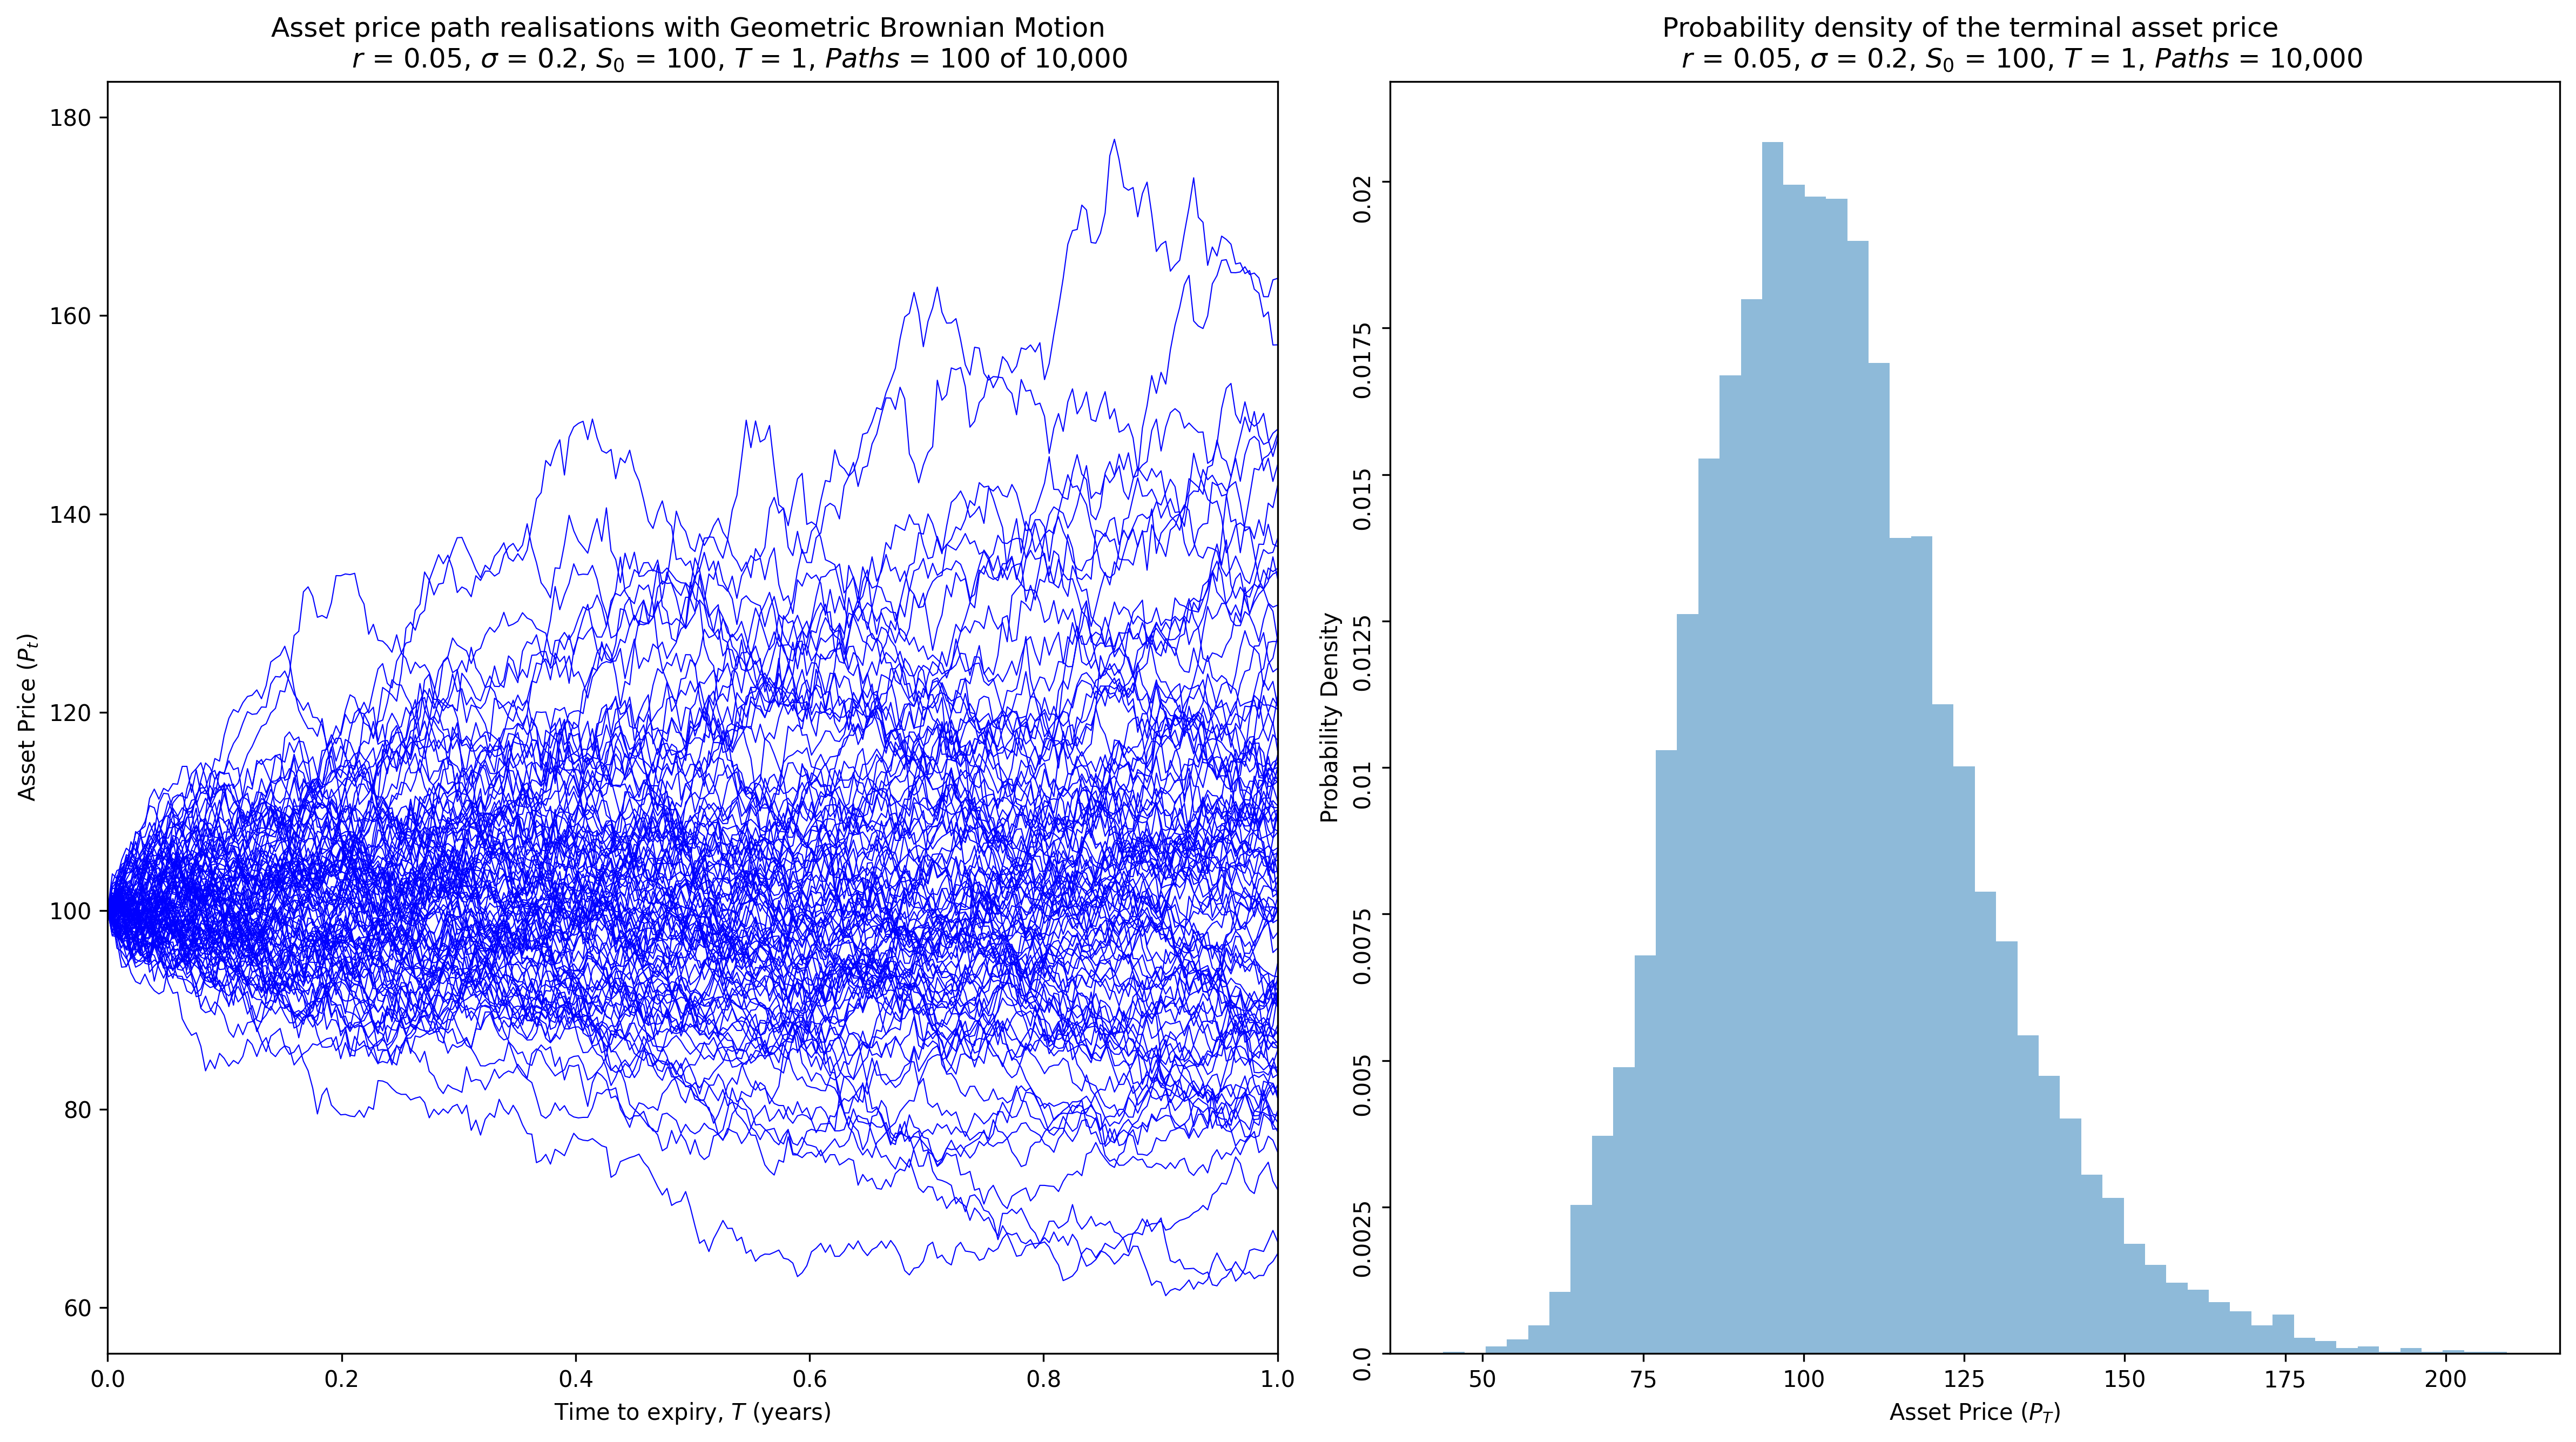

In [83]:
# Plot the paths
display_paths = 100

plt.figure(figsize=(16, 9))

# Subplot 1
plt.subplot(1, 2, 1)
for i in np.random.choice(np.array(range(asian.number_Of_Paths)), size=display_paths):
    plt.plot(time_axis, St[:, i], 'b', lw=0.5)
plt.xlim(0, asian.T)
plt.xlabel('Time to expiry, $T$ (years)')
plt.ylabel('Asset Price ($P_t$)')
plt.title(f'Asset price path realisations with Geometric Brownian Motion \n \
          $r$ = {asian.r}, $\sigma$ = {asian.sigma}, $S_0$ = {asian.S0}, $T$ = {asian.T}, $Paths$ = {display_paths:,d} of {asian.number_Of_Paths:,d}')

# Subplot 2
ax = plt.subplot(1, 2, 2)
plt.hist(St[-1], bins=50, density=True, histtype='stepfilled', alpha=0.5, )

plt.xlabel('Asset Price ($P_T$)')
plt.ylabel('Probability Density')
plt.title(f'Probability density of the terminal asset price \n \
          $r$ = {asian.r}, $\sigma$ = {asian.sigma}, $S_0$ = {asian.S0}, $T$ = {asian.T}, $Paths$ = {asian.number_Of_Paths:,d}')
plt.tight_layout()

plt.show()

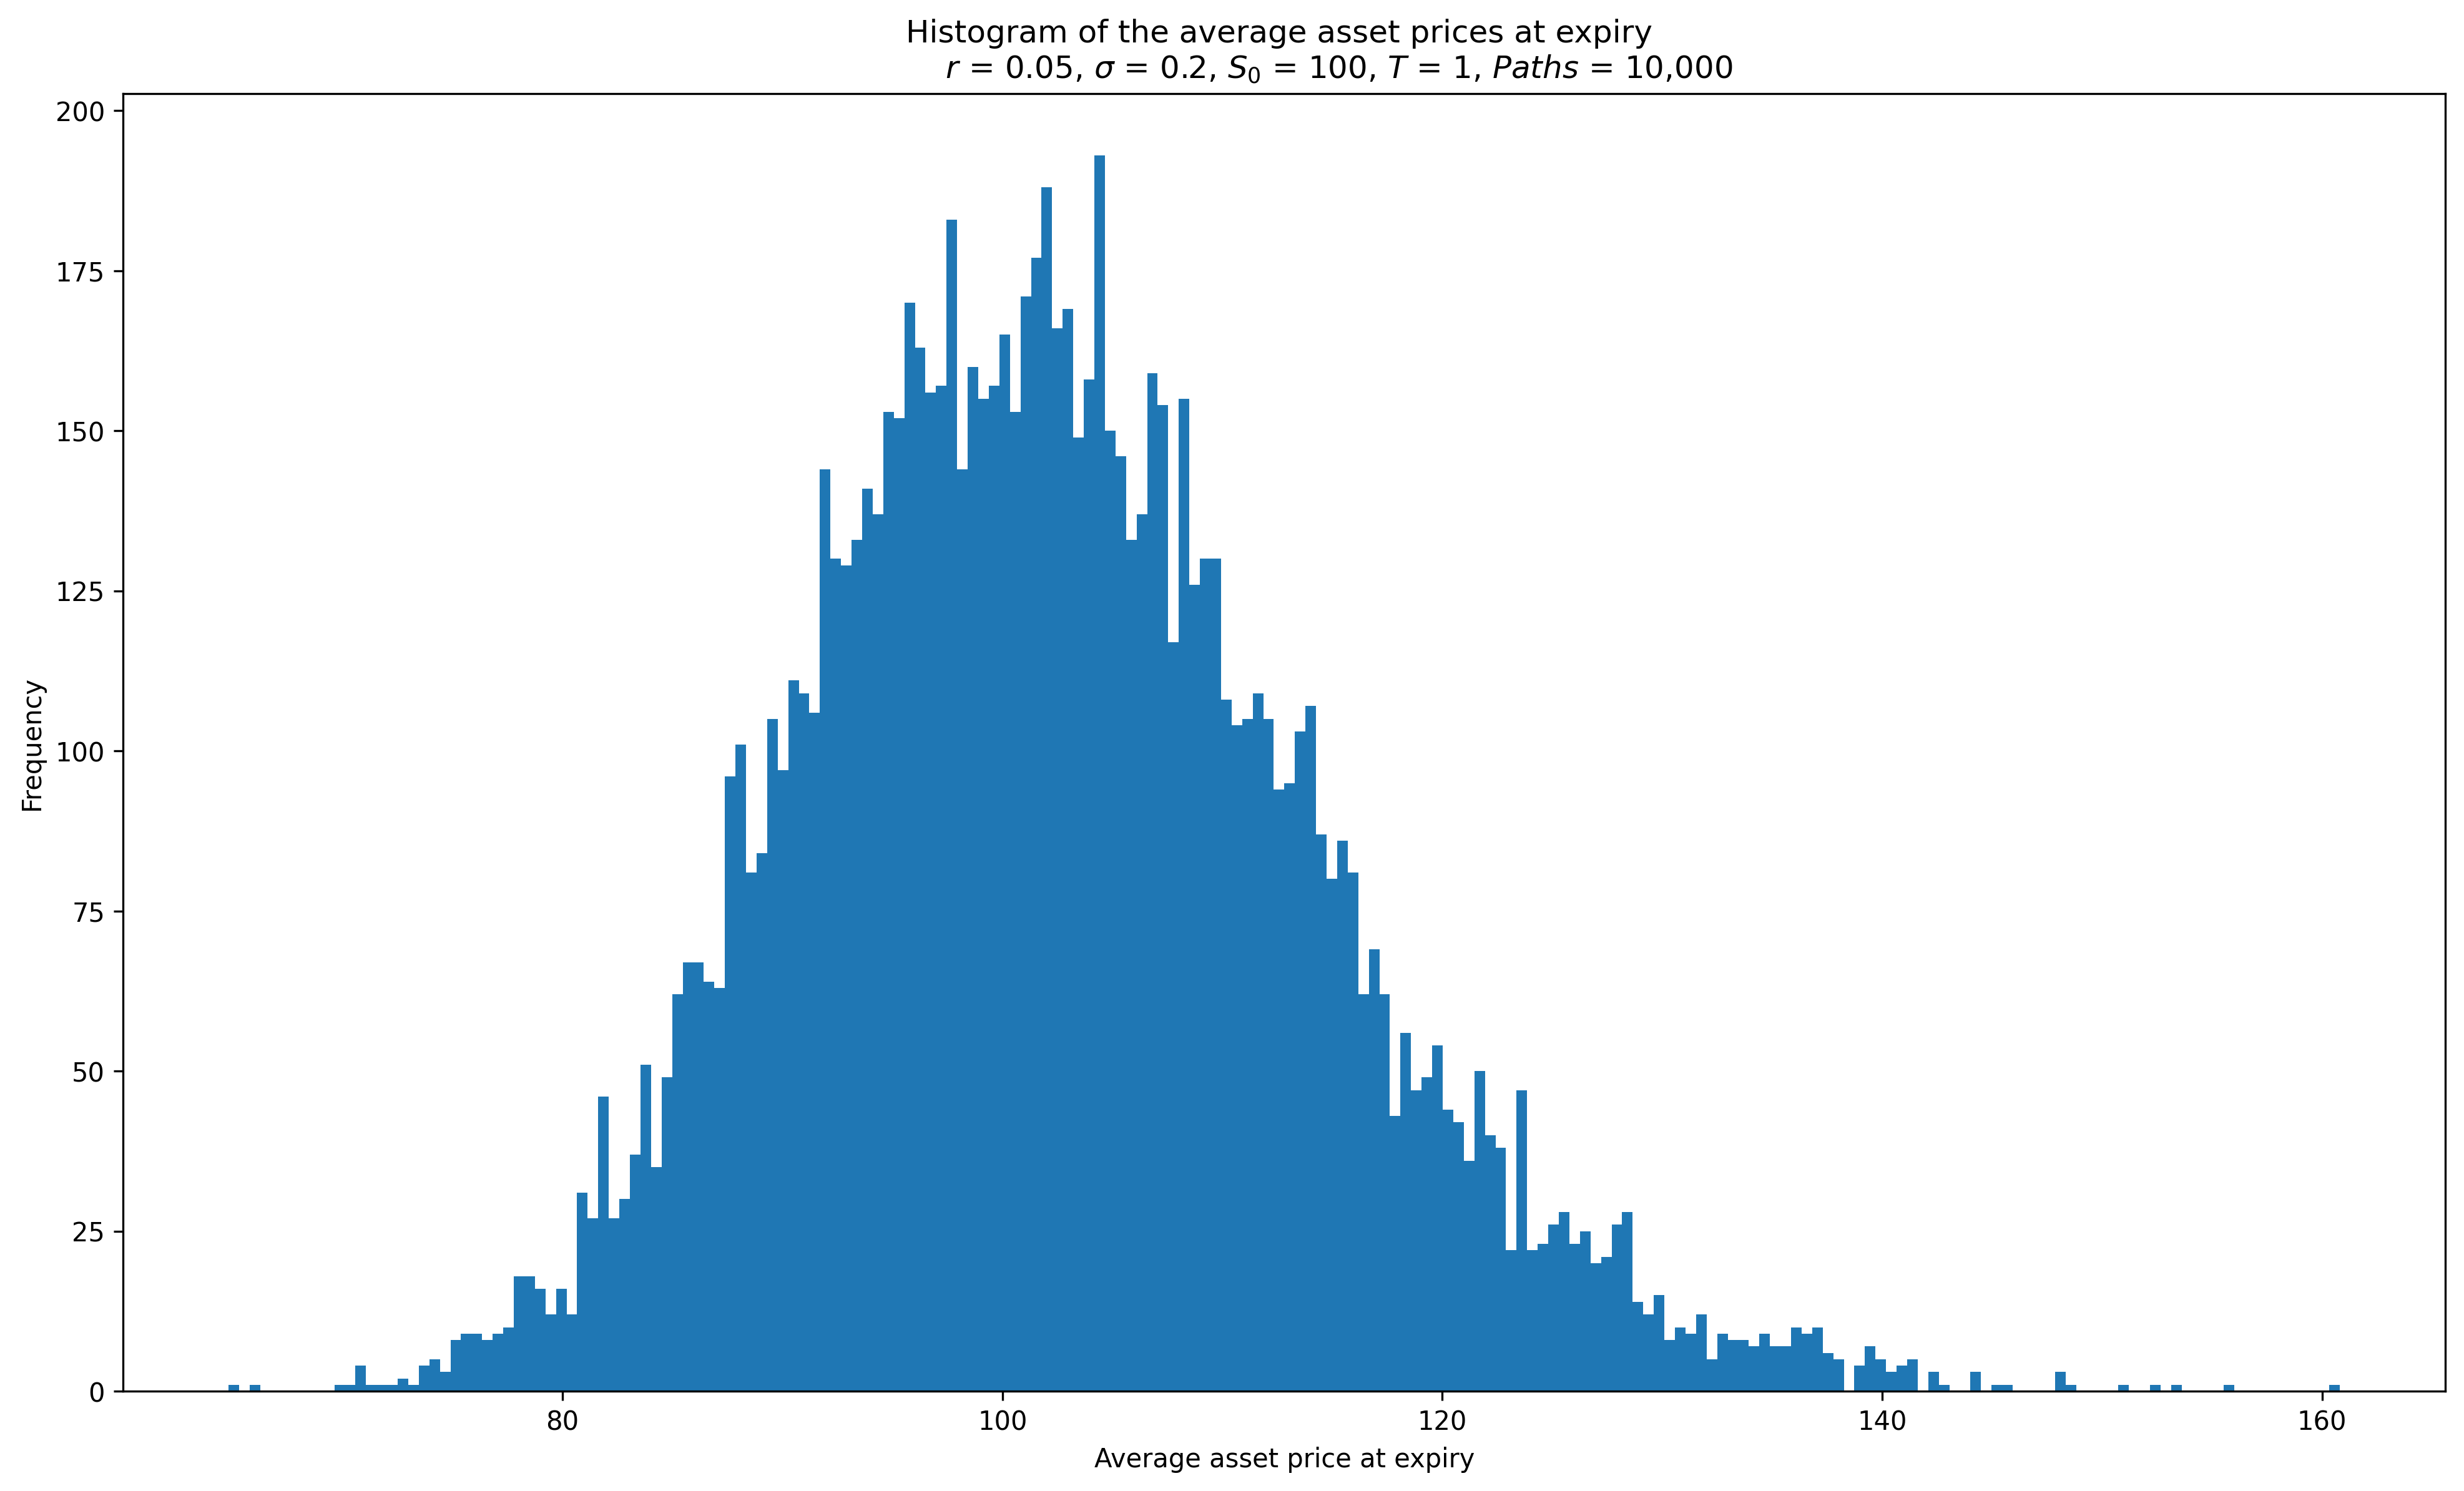

In [81]:
# Plot the histogram of the average asset prices at expiry
A = np.mean(St, axis=0)
plt.figure(figsize=(16, 9))
plt.title(f'Histogram of the average asset prices at expiry \n \
          $r$ = {asian.r}, $\sigma$ = {asian.sigma}, $S_0$ = {asian.S0}, $T$ = {asian.T}, $Paths$ = {asian.number_Of_Paths:,d}')
plt.xlabel('Average asset price at expiry')
plt.ylabel('Frequency')
plt.hist(A, bins=200)
plt.show()

## References
- 